<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Inclass - Lab File 3 <br>(Week 2 - Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Regularization](#reg)**
4. **[Grid Search](#gs)**

**Import the required libraries**

In [23]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Load the Life expectancy dataset and display the first five records 

In [93]:
# load the csv file
df = pd.read_csv('Life_Expectancy.csv')
# type your code here

# display the first five observations
df.head()
# type your code here
num = df.select_dtypes(include = np.number)
num.drop('Life_Expectancy',axis = 1,inplace = True)

In [94]:
num.head()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
0,2015,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2015,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,2015,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,2015,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,2015,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


#### Check the shape of the data and display its information

In [95]:
# check the size of the dataframe
df.shape
# type your code here

(182, 20)

In [96]:
# display dataset information understand the dataset
df.info()
# type your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# type your code here
df["Life_Expectancy"].isnull().sum()

9

In [98]:
df['Life_Expectancy'].fillna(df['Life_Expectancy'].median(), inplace = True)

In [99]:
df['Life_Expectancy'].isnull().sum()

0

<Axes: xlabel='Life_Expectancy', ylabel='Density'>

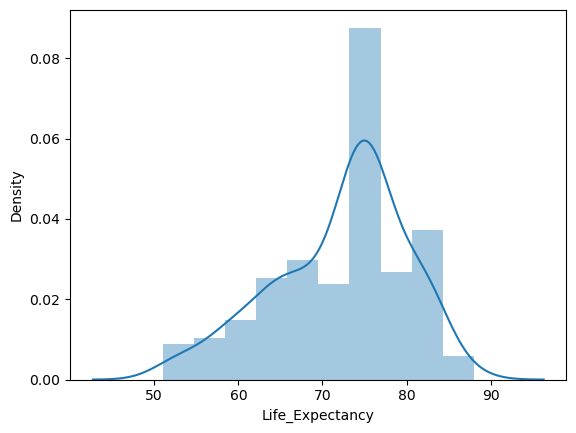

In [100]:
sns.distplot(df['Life_Expectancy'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# type your code here
df.isnull().sum() * 100/len(df)

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Alcohol              91.758242
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       0.000000
dtype: float64

In [102]:
df.drop('Alcohol', axis = 1, inplace = True)
num.drop('Alcohol', axis = 1, inplace = True)

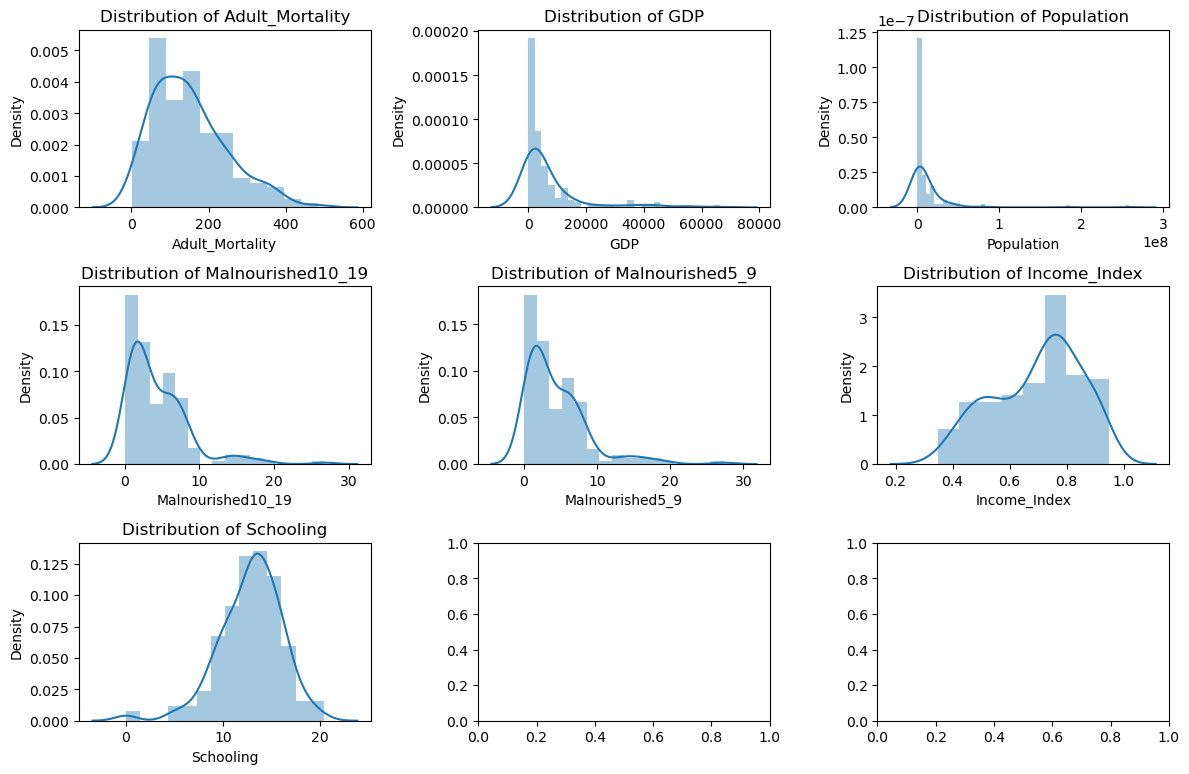

In [103]:
columns = ['Adult_Mortality','GDP','Population','Malnourished10_19','Malnourished5_9','Income_Index','Schooling']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Flatten the axes array
axes = axes.flatten()

# Plot distplots in a loop
for i, column in enumerate(columns):
    sns.distplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [104]:
#mean imputation for all
columns = ['Adult_Mortality','GDP','Population','Malnourished10_19','Malnourished5_9','Income_Index','Schooling', 'BMI']
for i in columns:
    df[i].fillna(df[i].mean(), inplace = True)

In [105]:
df.isnull().sum().sum()

9

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here
for cols in num.columns:
    print(f"{cols:20} {np.std(df[cols]):.2f},({df[cols].min(), df[cols].max()})")

Adult_Mortality      93.01,((1.0, 484.0))
Infant_Deaths        82.07,((0, 910))
Hepatitis B          25.32,((6.0, 99.0))
Measles              7838.31,((0, 90387))
BMI                  21.01,((2.5, 87.3))
Underfive_Deaths     105.61,((0, 1100))
Polio                24.90,((5, 99))
Diphtheria           22.89,((6, 99))
HIV                  1.33,((0.1, 9.3))
GDP                  10742.38,((33.681223, 66346.52267))
Population           25540503.29,((292.0, 258162113.0))
Malnourished10_19    4.08,((0.1, 26.7))
Malnourished5_9      4.16,((0.1, 27.3))
Income_Index         0.15,((0.347, 0.948))
Schooling            3.13,((0.0, 20.4))


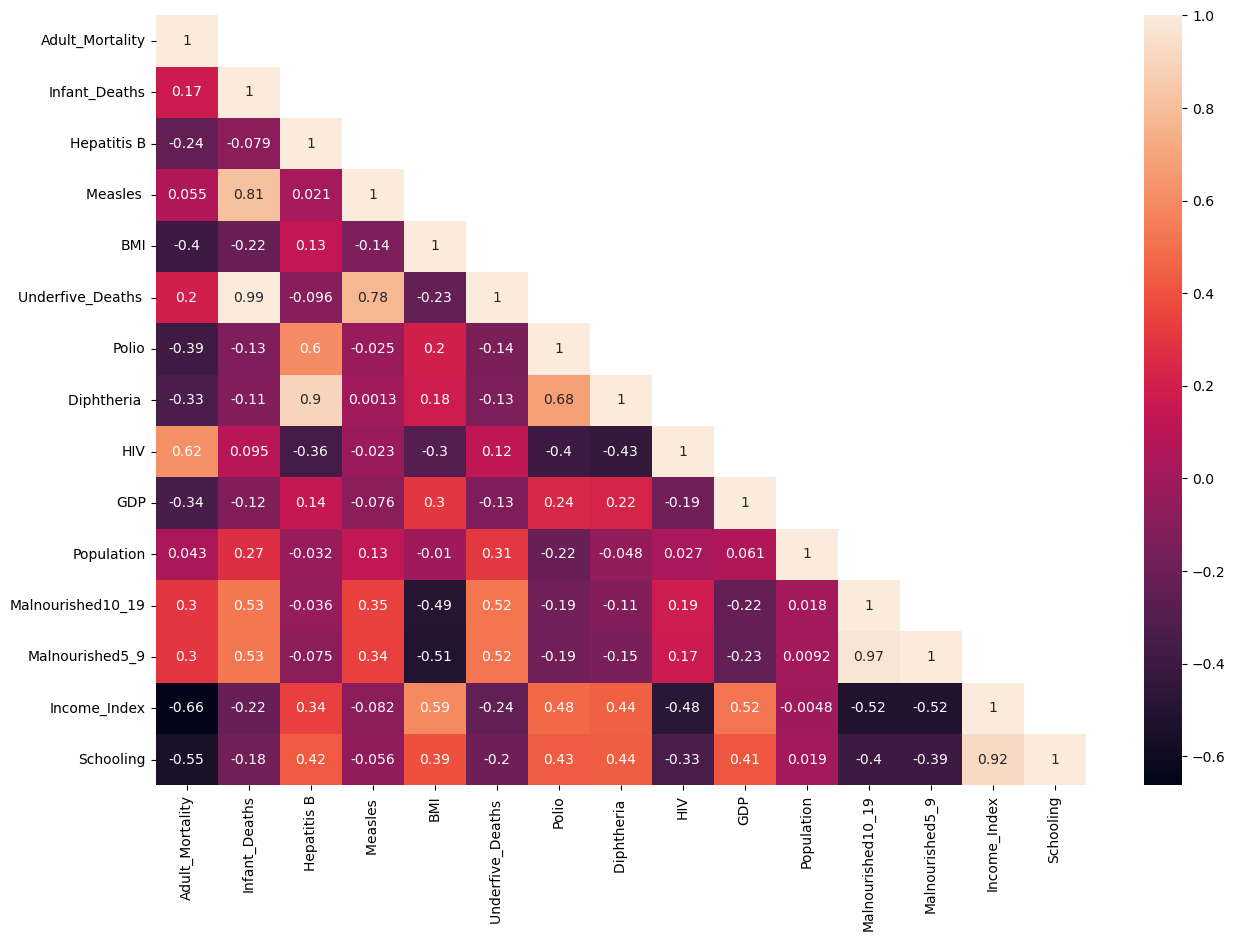

In [161]:
# num = num.drop('Year', axis = 1)
plt.figure(figsize=(15, 10))
sns.heatmap(num.corr(),annot = True,mask=np.triu(num.corr(),+1))
plt.show()

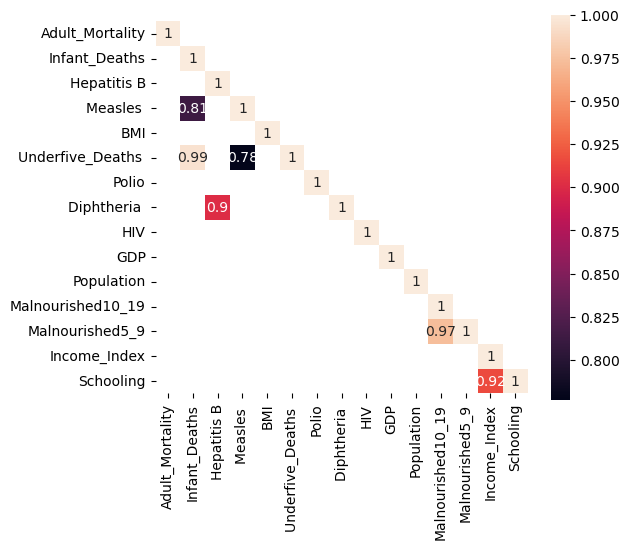

In [167]:
plt.figure(figsize=(6, 5))
sns.heatmap(num.corr()[(num.corr() >0.75) | (num.corr() < -0.75)],annot = True,mask=np.triu(num.corr(),+1), square=True)
plt.show()

In [168]:
#there are a few columns with auto correlaion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [171]:
# type your code here
df.head(2)

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2,77.8


In [172]:
#we need to perform dummy encoding for Staus column

In [178]:
dmy = pd.get_dummies(df['Status'], drop_first=True,prefix = 'Status')
df = pd.concat([df, dmy], axis=1)
df = df.drop('Status',axis = 1)
df.head()

,Country,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
0,Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1,65.0,1
1,Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2,77.8,1
2,Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4,75.6,1
3,Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4,52.4,1
4,Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,1.133250e+07,3.3,3.3,0.784,13.9,76.4,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a full model using least squares regression via SKLEARN. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here

<a id="reg"> </a>
## 3. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here

<a id="gs"> </a>
## 4. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here